<a href="https://colab.research.google.com/github/EmiliAlveSouza/BootCampAlura---Modulo-1/blob/main/Desafio_M%C3%B3dulo_1_Imuniza%C3%A7%C3%A3o_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imunizações no Brasil desde 1994

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataBase/dpnibr16247195918.csv', 
                 encoding='ISO-8859-1', sep=';', engine='python',
                 thousands='.', decimal=',')
df = dados.copy()

#### Utilizamos os dados referentes a 27 anos de informações sobre imunização por unidade da Federação. Os valores representam quantas DOSES foram aplicadas em cada estado.

In [4]:
df

,Ano/mês,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,1994,1066655,247271,1060057,243144,2702656,0,0,3573421,1665626,3525002,892862,0,3433375,0,0,6099252,0,1296432,0,0,0,2942516,0,0,1019664,1017343,0,30785276
1,1995,1131629,532068,1713669,382307,2989578,199883,0,4516440,1440068,3454249,1124588,779729,6212277,1093767,1244236,4356615,0,2549855,4418954,2694310,3546002,2591758,4945493,0,1243724,2890781,8370,56060350
2,1996,1321580,381238,2330216,343973,3762019,217548,861857,3235673,1339793,4313033,1374695,1620745,6013353,1424137,1158405,5576198,0,1810593,3624884,2685627,3282837,2102093,4818668,624349,1195919,2956842,1059721,59435996
3,1997,1268726,750997,2714198,330366,5986769,342782,940661,4463053,1491053,5798538,1593657,3235523,6364081,1802078,1220961,7641690,10308837,1749539,7275325,12155615,6709434,2759330,4990553,1245403,2057182,3327562,1522637,100046550
4,1998,1529870,613288,3701986,636257,7379632,594037,1617472,5709568,1604822,4654166,1686305,2694232,5992067,1897345,1145494,8814911,11316601,3115713,7678953,21983469,4531876,3420888,4771179,1445619,3558030,4236982,1844074,118174836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2021/Abr,63224,28942,189028,36320,250924,31940,61509,221188,105942,281440,91136,110115,278509,107863,65111,346102,659765,131405,325048,1604763,393909,284943,336498,105235,136519,257583,105783,6610744
218,2021/Mai,67149,21798,190923,14529,201502,25217,59461,167802,97407,144251,79095,80761,229863,105769,44515,282379,477430,111790,337238,986790,226849,198987,207492,75949,132260,163122,122817,4853145
219,2021/Jun,15882,1645,35805,5629,32889,2531,10817,17787,20740,22568,17593,13631,60164,21550,7917,43904,76894,28240,83091,146009,29111,22901,37360,14745,20194,33831,29846,853274
220,2021/Dez,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#### Podemos perceber que foram 222 unidades de tempo diferentes dividas em anos/meses

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ano/mês  222 non-null    object
 1   RO       222 non-null    int64 
 2   AC       222 non-null    int64 
 3   AM       222 non-null    int64 
 4   RR       222 non-null    int64 
 5   PA       222 non-null    int64 
 6   AP       222 non-null    int64 
 7   TO       222 non-null    int64 
 8   MA       222 non-null    int64 
 9   PI       222 non-null    int64 
 10  CE       222 non-null    int64 
 11  RN       222 non-null    int64 
 12  PB       222 non-null    int64 
 13  PE       222 non-null    int64 
 14  AL       222 non-null    int64 
 15  SE       222 non-null    int64 
 16  BA       222 non-null    int64 
 17  MG       222 non-null    int64 
 18  ES       222 non-null    int64 
 19  RJ       222 non-null    int64 
 20  SP       222 non-null    int64 
 21  PR       222 non-null    int64 
 22  SC

In [6]:
pd.options.display.float_format = "{:.2f}".format

#### Percebe-se que os 5 estados com maior incidência média de doses aplicadas durante todos os anos são: 
- São Paulo
- Minas Gerais
- Bahia
- Rio de Janeiro
- Paraná

In [7]:
df.mean().sort_values(ascending=False).head()

 Total   31103484.63
SP        6141202.02
MG        3076021.91
BA        2400398.50
RJ        2236116.43
dtype: float64

#### Os 5 estados com menor incidência média de doses aplicadas durante todos os anos são: 
- Roraima
- Amapá
- Acre
- Tocantins 
- Rondonia 

In [8]:
df.mean().sort_values(ascending=True).head()

RR   123580.98
AP   130053.06
AC   172308.06
TO   282154.85
RO   317997.74
dtype: float64

In [9]:
df['MS']    

0             0
1             0
2        624349
3       1245403
4       1445619
         ...   
217      105235
218       75949
219       14745
220           0
221    49408418
Name: MS, Length: 222, dtype: int64

In [10]:
df['MS'].mean()

445120.8828828829

In [11]:
df['SP'].mean()

6141202.018018018

In [12]:
df.columns

Index(['Ano/mês', 'RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE',
       'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF', ' Total'],
      dtype='object')

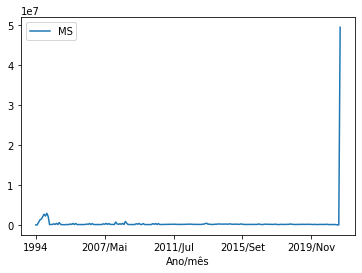

In [13]:
df.plot(x = 'Ano/mês', y='MS')

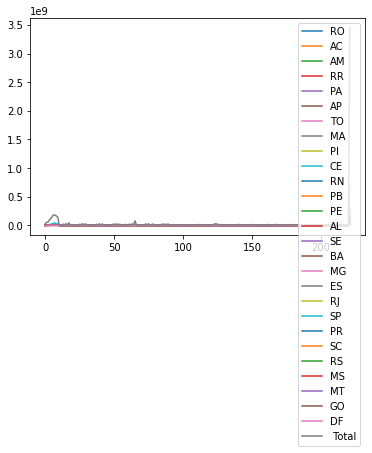

In [14]:
df.plot()

### Tira os totais dos eixos (x,y), totais de cada linha e de cada coluna

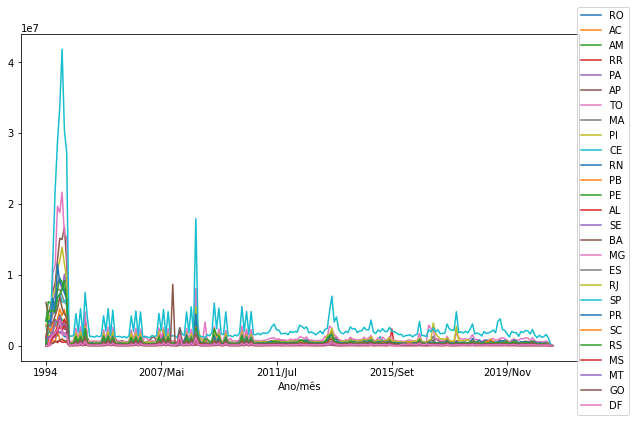

In [15]:
ax = df.iloc[:-1,:-1].set_index('Ano/mês').plot(figsize=(10,6))
ax.legend(bbox_to_anchor=(1.1,1.1), loc='best')

### Seta o indice como ano/mes de aplicação das doses

In [ ]:
df = df.set_index('Ano/mês')


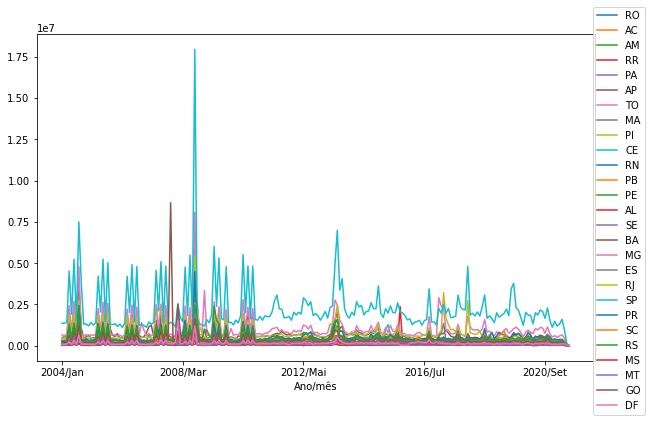

In [ ]:
df.iloc[10:-1, :-1].plot(figsize=(10,6))
plt.legend(bbox_to_anchor=(1.1,1.1), loc='best')
plt.show()

### Seta uma paleta de cores para representar cada estado

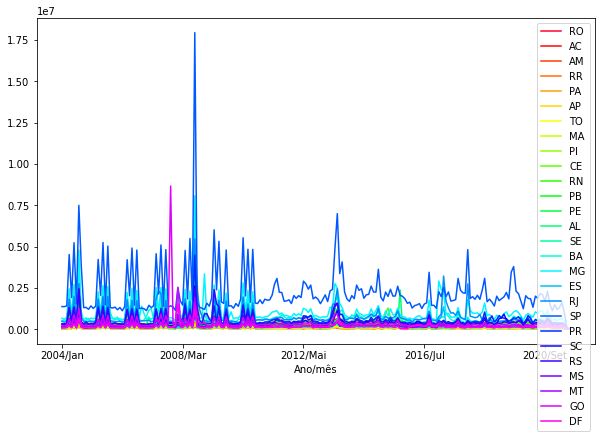

In [ ]:
number=27
colormap = plt.get_cmap('gist_rainbow') 
colors = [colormap(i/number) for i in range(number)]  
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)
# style = [LINE_STYLES[j%NUM_STYLES] for j in range(number)] 
# fig = plt.figure()
# ax = fig.add_subplot()]
ax= df.iloc[10:-1, :-1].plot(figsize=(10,6),color = colors)

# for i in range(number):
#   lines = ax.plot(df.iloc[10:-1, :-1])
#   # lines[0].set_color(i//NUM_STYLES*float(NUM_STYLES)/number)
# ax.legend(bbox_to_anchor=(1.1,1.1), loc='best')


In [ ]:
!pip install pyufbr geobr

In [ ]:
# invertido.set_index('Unidade_Federacao').loc[['DF','MT','MS'], '2004/Jan':'2021/Jun'].T.plot(figsize=(10,6))

In [ ]:
import geobr
states = geobr.read_state(year=2020)

In [ ]:
inv_regiao = df.T.reset_index().merge(states[['abbrev_state','name_region']], how ='left', left_on='index', right_on='abbrev_state')
inv_regiao = inv_regiao.drop(['abbrev_state'], axis=1)
inv_regiao

,index,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004/Jan,2004/Fev,2004/Mar,2004/Abr,2004/Mai,2004/Jun,2004/Jul,2004/Ago,2004/Set,2004/Out,2004/Nov,2004/Dez,2005/Jan,2005/Fev,2005/Mar,2005/Abr,2005/Mai,2005/Jun,2005/Jul,2005/Ago,2005/Set,2005/Out,2005/Nov,2005/Dez,2006/Jan,2006/Fev,2006/Mar,2006/Abr,2006/Mai,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Dez,Total,name_region
0,RO,1066655,1131629,1321580,1268726,1529870,1409218,1946752,1708077,1307970,1240459,59412,50286,63872,163641,98375,255876,67660,407848,86091,62203,61163,50168,60829,57520,67056,140338,112147,277818,81253,271000,83895,67842,66432,54844,61978,50048,70896,137398,96968,...,77652,138877,134188,79137,77014,68930,58752,82237,71341,71163,86015,88568,74321,80200,83566,91380,104087,79399,53573,80263,89835,78116,56546,74606,78199,79135,80150,72767,103360,85261,52408,51763,51216,61392,63224,67149,15882,0,35297749,Norte
1,AC,247271,532068,381238,750997,613288,2095997,897103,803376,730728,721201,29835,30364,32685,73805,36327,152545,29617,213787,44893,33049,46896,44585,38147,32353,40748,81125,60470,167135,43795,164098,46171,36614,39973,45911,33669,28387,31547,73388,38833,...,33138,39502,72646,34714,37836,32721,26697,40682,37351,36522,41670,40283,37626,41300,38967,37878,45440,41413,30822,44542,39371,34534,21410,29684,25823,33836,29468,32871,44162,32184,24494,28182,21841,26625,28942,21798,1645,0,19126195,Norte
2,AM,1060057,1713669,2330216,2714198,3701986,3090981,4375096,3627279,3437222,3021795,141808,138303,135221,329101,180026,550338,145775,782558,174625,134691,139112,143806,143753,139823,161628,311003,212548,637807,196026,615956,200793,167702,177842,160650,169975,151254,182510,323289,220685,...,234577,581957,556559,279503,257870,205095,171852,256039,229700,288559,283221,247671,208097,227808,244090,230625,252749,208671,158480,263926,228234,217478,63587,165544,223693,205120,223963,197850,273949,191785,156784,124813,148055,190915,189028,190923,35805,0,83559749,Norte
3,RR,243144,382307,343973,330366,636257,452054,696255,497155,512151,496589,20276,33949,28186,40779,39234,87124,26451,114758,43108,28049,27973,17211,28580,35231,35016,48487,40967,114937,35251,108524,31049,37787,31346,36177,35232,28908,33953,50288,43983,...,52105,61893,59952,39823,65675,63046,56998,72926,55377,53817,52092,61621,33496,39703,47430,48341,70431,51731,45694,58562,50014,42946,22287,24747,27616,54192,30122,31332,39993,28229,26100,32711,29345,35268,36320,14529,5629,0,13717489,Norte
4,PA,2702656,2989578,3762019,5986769,7379632,8898969,9555755,7828208,10078315,8499530,284587,302455,303220,852200,394939,1758807,311579,2464351,428887,289959,346201,270605,279086,285151,318783,792089,443288,1739909,344118,1700389,376840,333110,362759,307067,313921,289502,295892,727876,359722,...,259024,335140,476956,303202,308859,285931,216711,356131,327355,324522,336084,334859,299320,330618,360301,380274,500042,367945,248664,398677,417920,392104,191441,214890,306011,409831,406234,390568,415492,313143,199524,252466,229274,267251,250924,201502,32889,0,164474090,Norte
5,AP,0,199883,217548,342782,594037,623304,801443,950739,699919,603199,29143,19902,32661,55623,28364,114784,29240,174041,38844,27531,26995,23535,24850,24704,26188,54426,31288,132086,27634,119872,37665,29251,31023,22434,27870,23126,33347,51280,38595,...,30815,37164,70064,37582,40057,34560,27652,44310,37951,37158,36998,38210,32694,35682,41384,36309,43542,34882,26130,38710,38073,31077,9566,10908,19106,30790,28376,30409,43900,16400,24163,44654,55674,25229,31940,25217,2531,0,14435890,Norte
6,TO,0,0,861857,940661,1617472,1972340,2015982,1563858,1576494,1377203,68922,64348,70009,189502,69845,234066,55651,421013,65311,79002,93124,74794,75039,66754,86307,177337,91318,242998,65

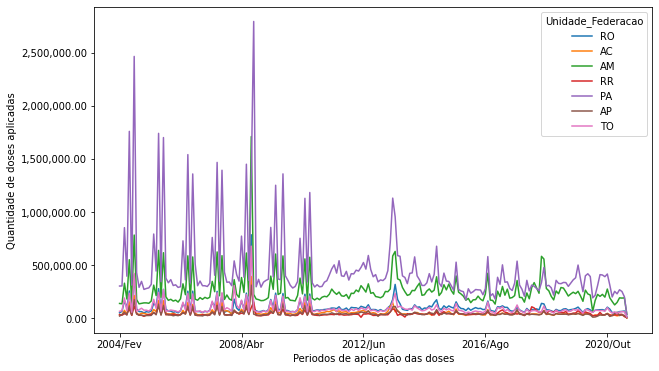

In [ ]:
inv_regiao = inv_regiao.rename({'index':"Unidade_Federacao"},axis=1)
norte = inv_regiao[inv_regiao['name_region'] == 'Norte'].set_index('Unidade_Federacao').iloc[:, 11:-3].T
ax = norte.plot(figsize=(10,6))
ax.yaxis.convert_units()
# set_major_formatter(tck.StrMethodFormatter('{x:,.2f}'))
plt.xlabel('Periodos de aplicação das doses')
plt.ylabel('Quantidade de doses aplicadas')
plt.title('Doses aplicadas ')
plt.show()

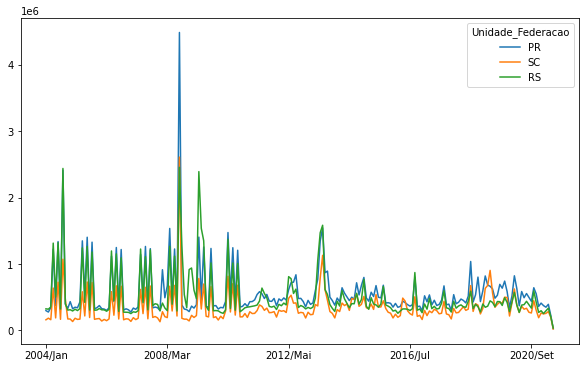

In [ ]:
sul = inv_regiao[inv_regiao['name_region'] == 'Sul'].set_index("Unidade_Federacao").iloc[:, 10:-3].T
sul.plot(figsize=(10,6))

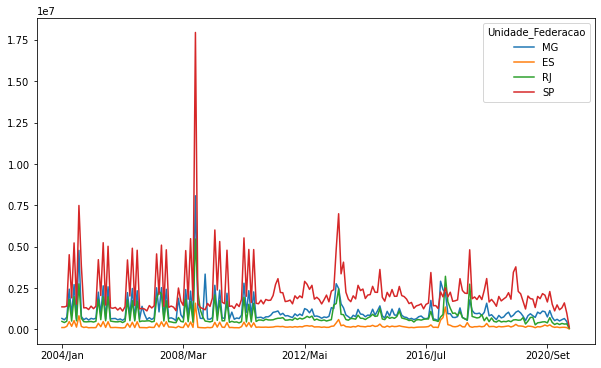

In [ ]:
sud = inv_regiao[inv_regiao['name_region'] == 'Sudeste'].set_index("Unidade_Federacao").iloc[:, 10:-3].T
sud.plot(figsize=(10,6))

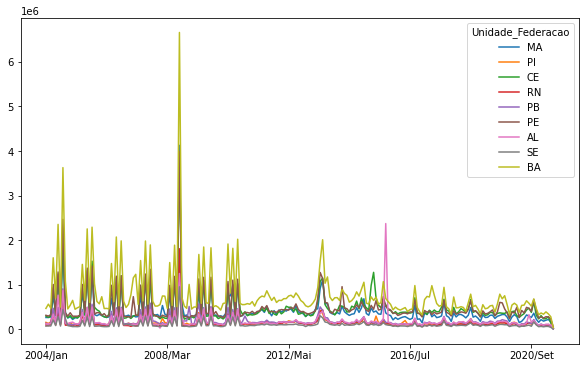

In [ ]:
nord = inv_regiao[inv_regiao['name_region'] == 'Nordeste'].set_index("Unidade_Federacao").iloc[:, 10:-3].T
nord.plot(figsize=(10,6))

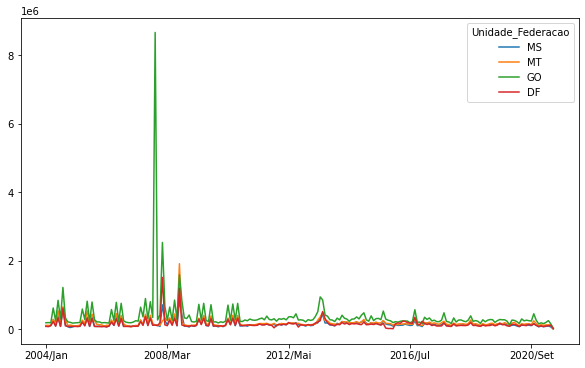

In [ ]:
cent = inv_regiao[inv_regiao['name_region'] == 'Centro Oeste'].set_index("Unidade_Federacao").iloc[:, 10:-3].T
cent.plot(figsize=(10,6))

## Criando um dataframe mudando a estrutura do anterior: 
- as linhas são compostas pelos estados
- as colunas são compostas pelos anos de 1994 a 2021

In [ ]:
invertido = dados.T.reset_index()
invertido.columns=invertido.loc[0,:]
invertido = invertido.drop(0)
invertido = invertido.rename({'Ano/mês':'Unidade_Federacao'},axis=1)
invertido

,Unidade_Federacao,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004/Jan,2004/Fev,2004/Mar,2004/Abr,2004/Mai,2004/Jun,2004/Jul,2004/Ago,2004/Set,2004/Out,2004/Nov,2004/Dez,2005/Jan,2005/Fev,2005/Mar,2005/Abr,2005/Mai,2005/Jun,2005/Jul,2005/Ago,2005/Set,2005/Out,2005/Nov,2005/Dez,2006/Jan,2006/Fev,2006/Mar,2006/Abr,2006/Mai,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Dez,Total
1,RO,1066655,1131629,1321580,1268726,1529870,1409218,1946752,1708077,1307970,1240459,59412,50286,63872,163641,98375,255876,67660,407848,86091,62203,61163,50168,60829,57520,67056,140338,112147,277818,81253,271000,83895,67842,66432,54844,61978,50048,70896,137398,96968,...,87536,77652,138877,134188,79137,77014,68930,58752,82237,71341,71163,86015,88568,74321,80200,83566,91380,104087,79399,53573,80263,89835,78116,56546,74606,78199,79135,80150,72767,103360,85261,52408,51763,51216,61392,63224,67149,15882,0,35297749
2,AC,247271,532068,381238,750997,613288,2095997,897103,803376,730728,721201,29835,30364,32685,73805,36327,152545,29617,213787,44893,33049,46896,44585,38147,32353,40748,81125,60470,167135,43795,164098,46171,36614,39973,45911,33669,28387,31547,73388,38833,...,39340,33138,39502,72646,34714,37836,32721,26697,40682,37351,36522,41670,40283,37626,41300,38967,37878,45440,41413,30822,44542,39371,34534,21410,29684,25823,33836,29468,32871,44162,32184,24494,28182,21841,26625,28942,21798,1645,0,19126195
3,AM,1060057,1713669,2330216,2714198,3701986,3090981,4375096,3627279,3437222,3021795,141808,138303,135221,329101,180026,550338,145775,782558,174625,134691,139112,143806,143753,139823,161628,311003,212548,637807,196026,615956,200793,167702,177842,160650,169975,151254,182510,323289,220685,...,284171,234577,581957,556559,279503,257870,205095,171852,256039,229700,288559,283221,247671,208097,227808,244090,230625,252749,208671,158480,263926,228234,217478,63587,165544,223693,205120,223963,197850,273949,191785,156784,124813,148055,190915,189028,190923,35805,0,83559749
4,RR,243144,382307,343973,330366,636257,452054,696255,497155,512151,496589,20276,33949,28186,40779,39234,87124,26451,114758,43108,28049,27973,17211,28580,35231,35016,48487,40967,114937,35251,108524,31049,37787,31346,36177,35232,28908,33953,50288,43983,...,72922,52105,61893,59952,39823,65675,63046,56998,72926,55377,53817,52092,61621,33496,39703,47430,48341,70431,51731,45694,58562,50014,42946,22287,24747,27616,54192,30122,31332,39993,28229,26100,32711,29345,35268,36320,14529,5629,0,13717489
5,PA,2702656,2989578,3762019,5986769,7379632,8898969,9555755,7828208,10078315,8499530,284587,302455,303220,852200,394939,1758807,311579,2464351,428887,289959,346201,270605,279086,285151,318783,792089,443288,1739909,344118,1700389,376840,333110,362759,307067,313921,289502,295892,727876,359722,...,279049,259024,335140,476956,303202,308859,285931,216711,356131,327355,324522,336084,334859,299320,330618,360301,380274,500042,367945,248664,398677,417920,392104,191441,214890,306011,409831,406234,390568,415492,313143,199524,252466,229274,267251,250924,201502,32889,0,164474090
6,AP,0,199883,217548,342782,594037,623304,801443,950739,699919,603199,29143,19902,32661,55623,28364,114784,29240,174041,38844,27531,26995,23535,24850,24704,26188,54426,31288,132086,27634,119872,37665,29251,31023,22434,27870,23126,33347,51280,38595,...,33486,30815,37164,70064,37582,40057,34560,27652,44310,37951,37158,36998,38210,32694,35682,41384,36309,43542,34882,26130,38710,38073,31077,9566,10908,19106,30790,28376,30409,43900,16400,24163,44654,55674,25229,31940,25217,2531,0,14435890
7,TO,0,0,861857,940661,1617472,1972340,2015982,1563858,1576494,1377203,68922,64348,70009,189502,69845,234066,55651,421013,65311,79002,93124,74794,75039,66754,86307,177337,9131

In [ ]:
invertido[:-1].plot(x='Unidade_Federacao', y='1994')

#### Plotando a quantidade vacinados por estado durante o ano de 2001

In [ ]:
invertido[:-1].plot(x='Unidade_Federacao', y='2001', kind= 'bar', figsize=(9,6))

In [ ]:
invertido.columns

In [ ]:
invertido.loc[:, ['Unidade_Federacao','2001']]

In [ ]:
#ctrl+shift+space = tips documentation
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax=invertido[:-1].plot(x = 'Unidade_Federacao', y='2001', kind='bar', figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title('Doses aplicadas por unidade da federação')
plt.show()

In [ ]:
df

In [ ]:
# invertido.iloc[:,1:] = invertido.iloc[:,1:].apply(pd.to_numeric)
invertido = invertido.infer_objects()
invertido.dtypes

In [ ]:
colunas_usaveis = invertido.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade_Federacao")
colunas_usaveis

In [ ]:
usaveis = invertido[colunas_usaveis]
usaveis.head()

In [ ]:
usaveis = usaveis.set_index("Unidade_Federacao")
usaveis

In [ ]:
usaveis = usaveis.drop("Total", axis=1)
usaveis.head()